In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings
import circlify as circ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pywaffle import Waffle
from pprint import pprint as pp
import squarify


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
# require('theme538')

R[write to console]: Loading required package: ggplot2

R[write to console]: Need help? Try Stackoverflow: https://stackoverflow.com/tags/ggplot2

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2



In [4]:
reserve_df = pd.read_csv("global_lithium_reserves.csv")
# reserve_df['reserve_in_100k_tons(rounded)'] = round(reserve_df['reserve'].apply(lambda x: x/100000))

# Add a new row for the rest of the countries
reserve_df = reserve_df.append({'country': 'Others', 'reserve': reserve_df[reserve_df['country'].isin(['Finland', 'Austria', 'Kazakhstan'])]['reserve'].sum()}, ignore_index=True)

# Drop Finland, Austria, Kazakhstan from the country column.
reserve_df = reserve_df[~reserve_df['country'].isin(['Finland', 'Austria', 'Kazakhstan'])]

reserve_df.sort_values(by='reserve', ascending=False, inplace=True)
reserve_df['reserve_in_1000_tons'] = reserve_df['reserve'].apply(lambda x: x/1000)

reserve_df

,country,reserve,reserve_in_1000_tons
1,Bolivia,21000000,21000.0
2,Argentina,20000000,20000.0
0,United States,12000000,12000.0
3,Chile,11000000,11000.0
4,Australia,7900000,7900.0
5,China,6800000,6800.0
6,Germany,3200000,3200.0
7,Congo,3000000,3000.0
8,Canada,2900000,2900.0
9,Mexico,1700000,1700.0


In [5]:
# plt.figure(FigureClass=Waffle, figsize=(100,20), rows=30, columns = 60, 
#                 values=list(reserve_df['reserve_in_1000_tons']),
#                 labels=list(reserve_df['country']),
#                 legend={'loc':'lower center', 'bbox_to_anchor': (0.5, -0.1), 
#                         'ncol':3, 'fontsize':8})

In [6]:
total_global_reserve = reserve_df['reserve'].sum()

In [28]:
production_df = pd.read_csv("global_production.csv")

production_df['production_in_tons'] = production_df['production'].apply(lambda x: x*1000)
# drop "production" column.
production_df.drop('production', axis=1, inplace=True)
production_df['production_in_1000_tons'] = round(production_df['production_in_tons'].apply(lambda x: x/1000))

production_df

# Add 12 rows to the production_df and fill them with the sum of the production of all countries in each year, from 2011 to 2022.
for year in range(2011, 2023):
    production_df = production_df.append({'year': year, 'country': 'Total', 'production_in_tons': production_df[production_df['year'] == year]['production_in_tons'].sum()}, ignore_index=True)

production_df.to_csv("production_with_total.csv", index=False)


In [8]:
total_global_production = production_df['production_in_tons'].sum()

In [9]:
# Create dataframe of total global reserve and total global production
total_df = pd.DataFrame({'reserve': [total_global_reserve], 'production': [total_global_production]})

total_transposed = total_df.T.reset_index()
total_transposed.columns = ['type', 'value']

total_transposed.to_csv('total_transposed.csv', index=False)

total_transposed

,type,value
0,reserve,97318000.0
1,production,749300.0


In [10]:
circles = circ.circlify([97318000, 749300])

pp(circles)




[Circle(x=-0.9193315959122236, y=0.0, r=0.08066840408777637, level=1, ex={'datum': 749300}),
 Circle(x=0.08066840408777642, y=0.0, r=0.9193315959122236, level=1, ex={'datum': 97318000})]


In [22]:
production_2022 = production_df[production_df.year==2022].head(50)

production_2022_vs_reserve = production_2022.merge(reserve_df, on='country', how='right')

production_2022_vs_reserve.to_csv('production_2022_vs_reserve.csv', index=False)

production_2022_vs_reserve

,year,country,production,reserve,reserve_in_1000_tons
0,NaN,Bolivia,NaN,21000000,21000.0
1,2022.0,Argentina,6.2,20000000,20000.0
2,2022.0,United States,0.6,12000000,12000.0
3,2022.0,Chile,39.0,11000000,11000.0
4,2022.0,Australia,61.0,7900000,7900.0
5,2022.0,China,19.0,6800000,6800.0
6,NaN,Germany,NaN,3200000,3200.0
7,NaN,Congo,NaN,3000000,3000.0
8,NaN,Canada,NaN,2900000,2900.0
9,NaN,Mexico,NaN,1700000,1700.0


In [12]:
production_df.pivot(index='country', columns='year', values='production_in_1000_tons').fillna(0).reset_index().to_csv('production_pivot_country.csv', index=False)

In [13]:
production_df_transposed = production_df.pivot(index='year', columns='country', values='production_in_tons')

production_df_transposed.reset_index(inplace=True)

# Add a column with total production_in_tons.
production_df_transposed['total'] = production_df_transposed.sum(axis=1)

production_df_transposed.to_csv('production_df_transposed.csv', index=False)

production_df_transposed

country,year,Argentina,Australia,Brazil,Chile,China,Others,Portugal,United States,Zimbabwe,total
0,2011,3000.0,11700.0,300.0,11900.0,4100.0,0.0,600.0,1000.0,500.0,35111.0
1,2012,2700.0,12700.0,200.0,12300.0,4500.0,0.0,300.0,1000.0,1100.0,36812.0
2,2013,2500.0,10100.0,400.0,10500.0,4700.0,0.0,300.0,900.0,1000.0,32413.0
3,2014,3200.0,12400.0,200.0,10800.0,2300.0,0.0,300.0,900.0,900.0,33014.0
4,2015,3600.0,11900.0,100.0,9800.0,2000.0,0.0,300.0,900.0,900.0,31515.0
5,2016,5800.0,14000.0,200.0,13600.0,2300.0,0.0,400.0,900.0,1000.0,40216.0
6,2017,5700.0,21300.0,300.0,14200.0,6800.0,100.0,800.0,900.0,800.0,52917.0
7,2018,6400.0,57000.0,1000.0,17000.0,7100.0,3000.0,1200.0,900.0,1600.0,97218.0
8,2019,6300.0,45000.0,2200.0,19200.0,10800.0,400.0,900.0,900.0,1200.0,88919.0
9,2020,5900.0,40000.0,1400.0,21600.0,13300.0,100.0,300.0,900.0,400.0,85920.0


# U.S. import by country

In [14]:
# Create dataframe.
import_countries_df = pd.DataFrame({'country': ['Argentina', 'Chile', 'China', 'Russia', 'Other'], 'import_share': [51, 40, 4, 3, 2]})

import_countries_df

,country,import_share
0,Argentina,51
1,Chile,40
2,China,4
3,Russia,3
4,Other,2


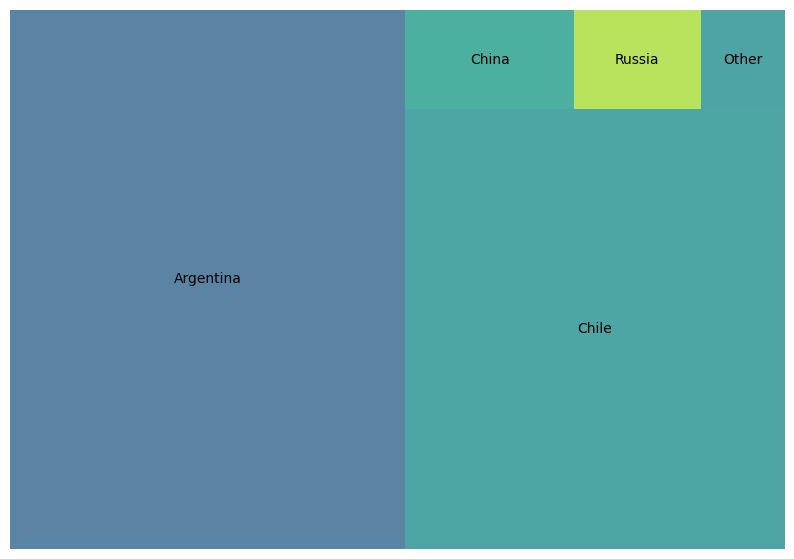

In [15]:
squarify.plot(sizes=import_countries_df['import_share'], label=import_countries_df['country'], alpha=.8 )
plt.axis('off')
# set figsize
plt.gcf().set_size_inches(10, 7)

plt.savefig('us_import.svg')


# Create Sankey Diagram

In [16]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

In [17]:
data

{'data': [{'type': 'sankey',
   'domain': {'x': [0, 1], 'y': [0, 1]},
   'orientation': 'h',
   'valueformat': '.0f',
   'valuesuffix': 'TWh',
   'node': {'pad': 15,
    'thickness': 15,
    'line': {'color': 'black', 'width': 0.5},
    'label': ["Agricultural 'waste'",
     'Bio-conversion',
     'Liquid',
     'Losses',
     'Solid',
     'Gas',
     'Biofuel imports',
     'Biomass imports',
     'Coal imports',
     'Coal',
     'Coal reserves',
     'District heating',
     'Industry',
     'Heating and cooling - commercial',
     'Heating and cooling - homes',
     'Electricity grid',
     'Over generation / exports',
     'H2 conversion',
     'Road transport',
     'Agriculture',
     'Rail transport',
     'Lighting & appliances - commercial',
     'Lighting & appliances - homes',
     'Gas imports',
     'Ngas',
     'Gas reserves',
     'Thermal generation',
     'Geothermal',
     'H2',
     'Hydro',
     'International shipping',
     'Domestic aviation',
     'Internation